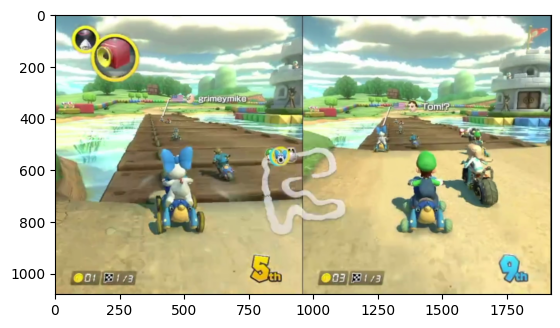

In [85]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

image_path = "../../race_videos/training_fullres/frames/0/000012.png"

# Read the image from disk
image = cv2.imread(image_path)

# convert image so its plottable im jupyter
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


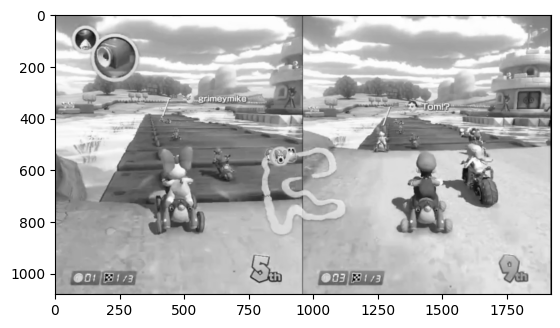

In [86]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

''

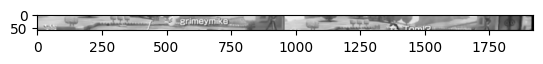

In [87]:
# crop to just the bottom 60 pixels of the image
cropped = image[300:360, :]
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

pytesseract.image_to_string(cropped, config='--oem 3 --psm 8 -c tessedit_char_whitelist=0123456789/')

''

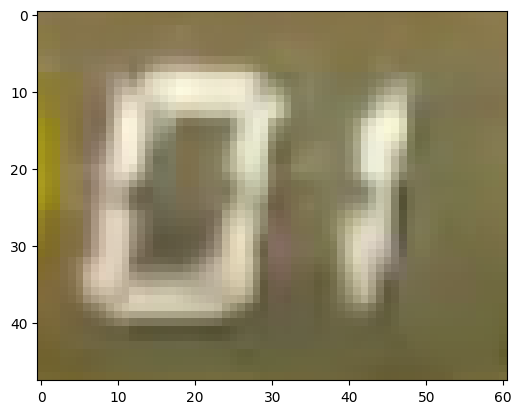

In [118]:
# p1_coins': (0.053125, 0.916, 0.0375, 0.0556),

h = 1080
w = 1920

y1 = round(h * 0.92)
y2 = round(h * 0.965)
x1 = round(w * 0.056)
x2 = round(w * 0.088)

# crop to just p1 coin count
cropped = image[y1:y2, x1:x2]
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

# pytesseract.image_to_string(cropped, config='--oem 3 --psm 10 -c tessedit_char_whitelist=0123456789')
pytesseract.image_to_string(cropped, config='--oem 1 --psm 6 digits')

''

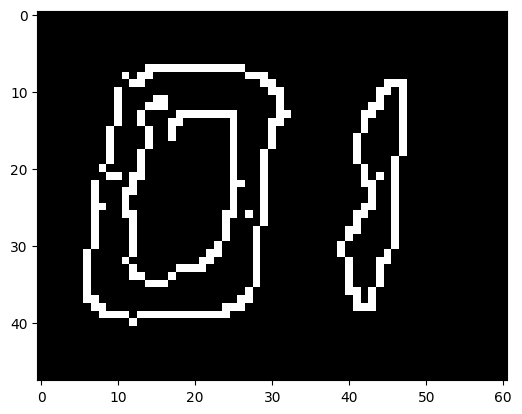

In [119]:
edges = cv2.Canny(cropped, threshold1=100, threshold2=200)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

pytesseract.image_to_string(cropped, config='--psm 6 digits')

''

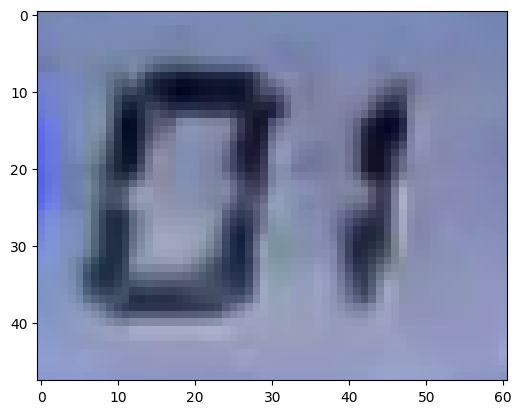

In [120]:
inverted = 255 - cropped
plt.imshow(cv2.cvtColor(inverted, cv2.COLOR_BGR2RGB))

pytesseract.image_to_string(inverted, config='--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789')

''

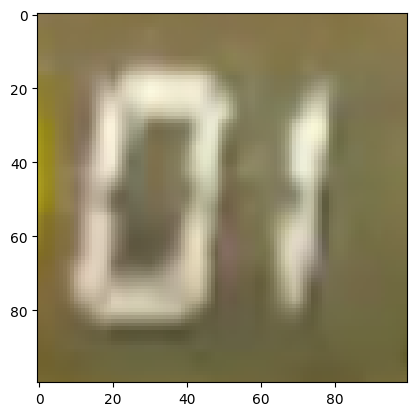

In [121]:
scaled = cv2.resize(cropped, (100, 100))
plt.imshow(cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB))

pytesseract.image_to_string(scaled, config='--oem 3 --psm 6 digits')

''

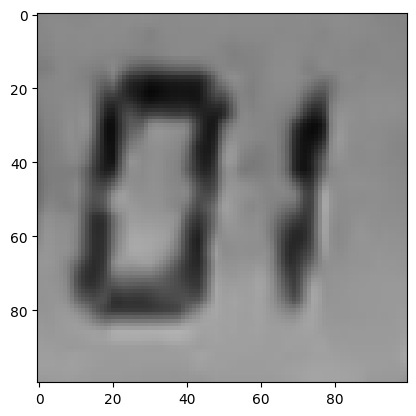

In [115]:
scaled_invert = 255 - scaled
plt.imshow(cv2.cvtColor(scaled_invert, cv2.COLOR_BGR2RGB))

pytesseract.image_to_string(scaled_invert, config='--oem 3 --psm 6 digits')

''

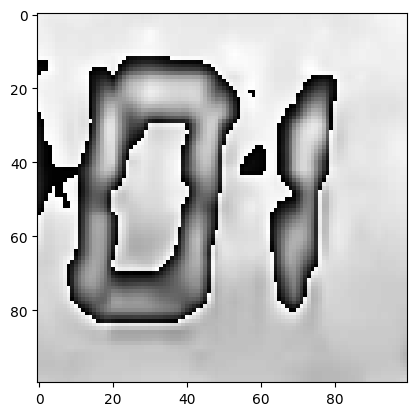

In [105]:
contrast = 2 * scaled
plt.imshow(cv2.cvtColor(contrast, cv2.COLOR_BGR2RGB))

pytesseract.image_to_string(scaled, config='--oem 3 --psm 8 -c tessedit_char_whitelist=0123456789')

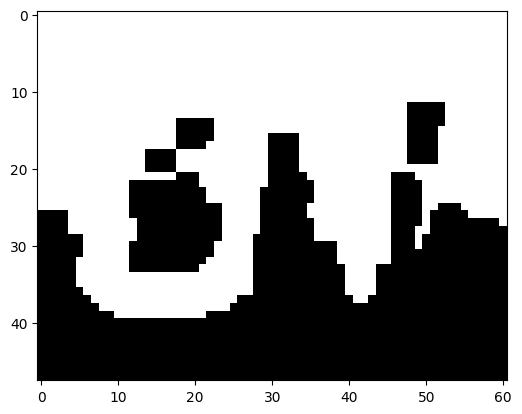

In [106]:
import numpy as np

ret, thresh = cv2.threshold(cropped, 110, 255, cv2.THRESH_BINARY) 
kernel = np.ones((3,3),np.uint8)
kerneled = cv2.erode(thresh,kernel,iterations = 1)

plt.imshow(cv2.cvtColor(kerneled, cv2.COLOR_BGR2RGB))
